In [1]:
import pandas as pd
df = pd.read_csv("Fake_Real_Data.csv")
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [3]:
df.shape

(9900, 2)

### Check for null values

In [4]:
df.isna().sum()

Text     0
label    0
dtype: int64

### Check for data imbalance

In [5]:
df["label"].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

#### Since the number of data in real and fake class is almost close to each other, there is no need for balancing the data set.

### Creating a new column and assigning numeric values to the label column 

In [7]:
df["label_num"] = df["label"].map({'Fake':0, 'Real':1})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


### Processing the values in the text column

#### First we have  to remove the stop words from the actual texts.

In [8]:
df["Text"][0]

' Top Trump Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? Trump s referr

In [9]:
text1 = df["Text"][0]

In [10]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [11]:
doc = nlp(text1)

filtered_tokens = []

for token in doc:
    if not token.is_stop and not token.is_punct:
        filtered_tokens.append(token.lemma_)

print(filtered_tokens)    

[' ', 'Trump', 'Surrogate', 'BRUTALLY', 'Stabs', 'Pathetic', 'video', 's', 'look', 'republican', 'presidential', 'candidate', 'Donald', 'Trump', 'lose', 'support', 'rank', 'know', 'thing', 'get', 'bad', 'surrogate', 'start', 'turn', 'exactly', 'happen', 'Fox', 'News', 'Newt', 'Gingrich', 'call', 'Trump', ' ', 'pathetic', 'Gingrich', 'know', 'Trump', 'need', 'focus', 'Hillary', 'Clinton', 'remotely', 'want', 'chance', 'defeat', 'Trump', 'hurt', 'feeling', 'Republicans', 'don', 't', 'support', 'sexual', 'assault', 'woman', 'turn', 'include', 'House', 'Speaker', 'Paul', 'Ryan', 'R', 'WI', 'Trump', 'lash', 'party', 'Gingrich', 'say', 'Fox', 'News', 'look', 'let', 'Trump', 'admire', 've', 'try', 'help', 's', 'big', 'trump', 'little', 'Trump', 'little', 'Trump', 'frankly', 'pathetic', 'mean', 's', 'mad', 'get', 'phone', 'Trump', 's', 'refer', 'fact', 'Paul', 'Ryan', 'didn', 't', 'congratulate', 'debate', 'probably', 'didn', 't', 'win', 'despite', 'Trump', 's', 'ego', 'tell', 'Gingrich', 'add

In [12]:
doc = nlp(text1)
filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]
print(filtered_tokens)

['Trump', 'Surrogate', 'BRUTALLY', 'Stabs', 'Pathetic', 'video', 's', 'look', 'republican', 'presidential', 'candidate', 'Donald', 'Trump', 'lose', 'support', 'rank', 'know', 'thing', 'get', 'bad', 'surrogate', 'start', 'turn', 'exactly', 'happen', 'Fox', 'News', 'Newt', 'Gingrich', 'call', 'Trump', 'pathetic', 'Gingrich', 'know', 'Trump', 'need', 'focus', 'Hillary', 'Clinton', 'remotely', 'want', 'chance', 'defeat', 'Trump', 'hurt', 'feeling', 'Republicans', 'don', 't', 'support', 'sexual', 'assault', 'woman', 'turn', 'include', 'House', 'Speaker', 'Paul', 'Ryan', 'R', 'WI', 'Trump', 'lash', 'party', 'Gingrich', 'say', 'Fox', 'News', 'look', 'let', 'Trump', 'admire', 've', 'try', 'help', 's', 'big', 'trump', 'little', 'Trump', 'little', 'Trump', 'frankly', 'pathetic', 'mean', 's', 'mad', 'get', 'phone', 'Trump', 's', 'refer', 'fact', 'Paul', 'Ryan', 'didn', 't', 'congratulate', 'debate', 'probably', 'didn', 't', 'win', 'despite', 'Trump', 's', 'ego', 'tell', 'Gingrich', 'add', 'Donald

In [15]:
doc = nlp(text1)
filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]
processed_text = " ".join(filtered_tokens)
print(processed_text)

Trump Surrogate BRUTALLY Stabs Pathetic video s look republican presidential candidate Donald Trump lose support rank know thing get bad surrogate start turn exactly happen Fox News Newt Gingrich call Trump pathetic Gingrich know Trump need focus Hillary Clinton remotely want chance defeat Trump hurt feeling Republicans don t support sexual assault woman turn include House Speaker Paul Ryan R WI Trump lash party Gingrich say Fox News look let Trump admire ve try help s big trump little Trump little Trump frankly pathetic mean s mad get phone Trump s refer fact Paul Ryan didn t congratulate debate probably didn t win despite Trump s ego tell Gingrich add Donald Trump opponent Hillary Clinton Paul Ryan s anybody Trump doesn t realize person mad truly bad enemy ultimately lead defeat blame watch Politico Featured Photo Joe Raedle Getty Images


In [18]:
doc = nlp(text1)
filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]
processed_text = nlp(" ".join(filtered_tokens))
processed_text.vector

array([ 0.23853691,  1.5483878 , -2.1205227 ,  0.02540627,  1.5258054 ,
        0.82650375, -0.22930987,  2.6051934 , -1.9249073 , -0.50397116,
        2.1282032 ,  0.29283157, -2.294383  , -0.3269178 ,  0.92076653,
        1.2817297 ,  2.0017881 , -1.3848313 , -0.38643205,  2.1519847 ,
       -0.67942154,  0.622503  , -0.13684782, -1.8279645 , -0.24601752,
       -0.21635973,  0.53058785, -0.5609503 , -0.07130296,  0.74134266,
        1.4689404 ,  1.3223612 ,  0.31579602, -0.408836  , -0.7769556 ,
       -1.9853058 , -0.6049322 ,  0.36261702,  1.5740865 ,  1.6710008 ,
       -0.61333215, -0.82778716,  0.5874713 ,  0.5780382 , -1.5662209 ,
        0.5153829 ,  0.15178114, -2.848886  , -0.8699681 ,  2.0480995 ,
       -0.6907505 , -0.24248709,  1.5266061 , -2.1101143 , -0.60588545,
        0.6357968 ,  0.03649415,  1.1374111 ,  1.3693241 ,  0.9373719 ,
        2.3266506 ,  0.6165712 , -1.5098902 , -1.5608788 ,  1.8901485 ,
        0.81766886, -2.5432997 , -0.7682591 ,  0.22136272,  1.81

In [19]:
processed_text

Trump Surrogate BRUTALLY Stabs Pathetic video s look republican presidential candidate Donald Trump lose support rank know thing get bad surrogate start turn exactly happen Fox News Newt Gingrich call Trump pathetic Gingrich know Trump need focus Hillary Clinton remotely want chance defeat Trump hurt feeling Republicans don t support sexual assault woman turn include House Speaker Paul Ryan R WI Trump lash party Gingrich say Fox News look let Trump admire ve try help s big trump little Trump little Trump frankly pathetic mean s mad get phone Trump s refer fact Paul Ryan didn t congratulate debate probably didn t win despite Trump s ego tell Gingrich add Donald Trump opponent Hillary Clinton Paul Ryan s anybody Trump doesn t realize person mad truly bad enemy ultimately lead defeat blame watch Politico Featured Photo Joe Raedle Getty Images

In [20]:
def preprocess_and_vectorize(text):
    # Creating an nlp object
    doc = nlp(text)
    # Creating a list to get preprocessed tokens
    filtered_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.text.strip():
            filtered_tokens.append(token.lemma_)
    # Creating an nlp object to store preprcessed text        
    processed_text = nlp(" ".join(filtered_tokens))
    # Finally, applying vector method to get vector form of preprocessed text
    return processed_text.vector

In [21]:
preprocess_and_vectorize(text1)

array([ 0.23853691,  1.5483878 , -2.1205227 ,  0.02540627,  1.5258054 ,
        0.82650375, -0.22930987,  2.6051934 , -1.9249073 , -0.50397116,
        2.1282032 ,  0.29283157, -2.294383  , -0.3269178 ,  0.92076653,
        1.2817297 ,  2.0017881 , -1.3848313 , -0.38643205,  2.1519847 ,
       -0.67942154,  0.622503  , -0.13684782, -1.8279645 , -0.24601752,
       -0.21635973,  0.53058785, -0.5609503 , -0.07130296,  0.74134266,
        1.4689404 ,  1.3223612 ,  0.31579602, -0.408836  , -0.7769556 ,
       -1.9853058 , -0.6049322 ,  0.36261702,  1.5740865 ,  1.6710008 ,
       -0.61333215, -0.82778716,  0.5874713 ,  0.5780382 , -1.5662209 ,
        0.5153829 ,  0.15178114, -2.848886  , -0.8699681 ,  2.0480995 ,
       -0.6907505 , -0.24248709,  1.5266061 , -2.1101143 , -0.60588545,
        0.6357968 ,  0.03649415,  1.1374111 ,  1.3693241 ,  0.9373719 ,
        2.3266506 ,  0.6165712 , -1.5098902 , -1.5608788 ,  1.8901485 ,
        0.81766886, -2.5432997 , -0.7682591 ,  0.22136272,  1.81

In [22]:
preprocess_and_vectorize(text1).shape

(300,)

In [23]:
df["vector"] = df['Text'].apply(lambda text: preprocess_and_vectorize(text))

In [24]:
df

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.23853691, 1.5483878, -2.1205227, 0.02540627..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.6792709, 0.63884634, -1.5760688, 1.4465457..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.0823251, -0.4261325, -2.4899414, 1.5018184..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-1.6181663, 0.45096844, -1.5802605, 2.1018326..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.6243596, 0.7249644, -2.0244102, 1.5570543,..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0,"[-0.20688097, 0.5360972, -1.4178834, -0.391955..."
9896,Trump consults Republican senators on Fed chie...,Real,1,"[-0.8552601, 0.3807974, -1.2691618, 1.420082, ..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1,"[-0.40214196, 0.31726602, -1.3522375, 1.261210..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0,"[-0.061951414, 0.66812426, -2.0751743, 0.54158..."


### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["vector"].values, df["label_num"], test_size=0.2, random_state=2022)

In [26]:
X_train

array([array([-7.21745491e-01, -2.69678712e-01, -7.45949447e-01,  9.96085882e-01,
               1.98346722e+00,  4.71098572e-01,  3.96368921e-01,  1.92811441e+00,
              -6.42033160e-01, -2.51824260e-01,  1.81185544e+00,  8.43626738e-01,
              -2.99574089e+00,  3.01785558e-01, -1.17960572e+00,  1.38834286e+00,
               1.49628317e+00,  8.21242690e-01, -3.61673594e-01,  7.40265012e-01,
               2.82809287e-01, -5.57947122e-02, -7.39818752e-01,  9.46649969e-01,
               5.16200542e-01, -1.02936459e+00, -1.80778551e+00, -2.08614260e-01,
               3.36927533e-01, -4.14547533e-01,  7.48593390e-01,  1.46529281e+00,
              -2.25512251e-01,  1.78603783e-01, -7.61942744e-01, -1.31845474e+00,
              -3.81326862e-02,  7.52556562e-01,  5.70663273e-01,  1.05337836e-01,
              -6.58852160e-01,  2.79898614e-01,  3.26415777e-01,  8.01808953e-01,
              -9.81770694e-01,  3.73867720e-01,  1.22828901e+00, -1.25170147e+00,
               3

In [28]:
import numpy as np

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_train before reshaping: ", X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (7920,)
Shape of X_train before reshaping:  (1980,)
Shape of X_train after reshaping:  (7920, 300)
Shape of X_test after reshaping:  (1980, 300)


In [30]:
X_train_2d

array([[-0.7217455 , -0.2696787 , -0.74594945, ..., -1.0552964 ,
         0.06000553,  1.1937829 ],
       [-0.4882019 ,  0.77100295, -2.309786  , ...,  0.19223088,
        -1.44853   ,  1.258426  ],
       [-1.1970838 ,  0.66638535, -1.9896415 , ..., -1.3508372 ,
        -0.7620184 ,  1.5364459 ],
       ...,
       [-1.3649905 ,  0.24150921, -1.7466029 , ..., -1.6473987 ,
        -0.39486992,  0.7961222 ],
       [-1.7499257 , -0.26962596, -1.5529289 , ..., -1.4361457 ,
        -0.22832495,  1.3193727 ],
       [ 0.3752642 ,  0.8102902 , -2.2220788 , ...,  1.4605569 ,
        -2.1970136 ,  1.0564032 ]], dtype=float32)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [32]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [33]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1024
           1       0.93      0.97      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()
clf.fit(scaled_train_embed, y_train)

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1024
           1       0.99      0.99      0.99       956

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [35]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess_and_vectorize(n) for n in test_news]
clf.predict(test_news_vectors)

array([1, 0, 0], dtype=int64)

# Sentiment Analysis

In [1]:
import pandas as pd
df = pd.read_csv("Fake_Real_Data.csv")
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [2]:
from textblob import TextBlob

text = "The movie was good"
TextBlob(text).sentiment.polarity

0.7

In [3]:
df['Sentiment'] = df['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [4]:
df

,Text,label,Sentiment
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,-0.077404
1,U.S. conservative leader optimistic of common ...,Real,0.085714
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0.084368
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,-0.085190
4,Democrats say Trump agrees to work on immigrat...,Real,0.082814
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,-0.035191
9896,Trump consults Republican senators on Fed chie...,Real,0.301250
9897,Trump lawyers say judge lacks jurisdiction for...,Real,0.066986
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0.000488


In [5]:
df['Sentiment_Category'] = df['Sentiment'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

In [6]:
df[['Text', 'Sentiment', 'Sentiment_Category']]

,Text,Sentiment,Sentiment_Category
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,-0.077404,Negative
1,U.S. conservative leader optimistic of common ...,0.085714,Positive
2,"Trump proposes U.S. tax overhaul, stirs concer...",0.084368,Positive
3,Court Forces Ohio To Allow Millions Of Illega...,-0.085190,Negative
4,Democrats say Trump agrees to work on immigrat...,0.082814,Positive
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,-0.035191,Negative
9896,Trump consults Republican senators on Fed chie...,0.301250,Positive
9897,Trump lawyers say judge lacks jurisdiction for...,0.066986,Positive
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,0.000488,Positive


# Named Entity Recognition

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [10]:
def ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [11]:
ner("Apple Inc. was founded by Steve Jobs in Cupertino. The iPhone was first introduced in 2007.")

[('Apple Inc.', 'ORG'),
 ('Steve Jobs', 'PERSON'),
 ('Cupertino', 'GPE'),
 ('iPhone', 'ORG'),
 ('2007', 'DATE')]

In [12]:
df['NER'] = df['Text'].apply(ner)

In [13]:
df[['Text', 'NER']]

,Text,NER
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,"[(Republican, NORP), (Donald Trump, PERSON), (..."
1,U.S. conservative leader optimistic of common ...,"[(U.S., GPE), (WASHINGTON, GPE), (Reuters, ORG..."
2,"Trump proposes U.S. tax overhaul, stirs concer...","[(Trump, ORG), (U.S., GPE), (WASHINGTON, GPE),..."
3,Court Forces Ohio To Allow Millions Of Illega...,"[(Donald Trump, PERSON), (Ohio, GPE), (2016, D..."
4,Democrats say Trump agrees to work on immigrat...,"[(Democrats, NORP), (Trump, ORG), (WASHINGTON,..."
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,"[(Hillary, PERSON), (these days, DATE), (Twitt..."
9896,Trump consults Republican senators on Fed chie...,"[(Trump, ORG), (Republican, NORP), (Fed, ORG),..."
9897,Trump lawyers say judge lacks jurisdiction for...,"[(Trump, ORG), (NEW YORK, GPE), (Reuters, ORG)..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,"[(2008, DATE), (2008, DATE), (Donald Trump, PE..."


In [14]:
# Flatten the list of tuples and create a DataFrame
ner_df = pd.DataFrame([(ent, label) for row in df['NER'] for ent, label in row], columns=['Entity', 'Label'])

In [16]:
ner_df

,Entity,Label
0,Republican,NORP
1,Donald Trump,PERSON
2,Fox News,ORG
3,Newt Gingrich,PERSON
4,Trump,ORG
...,...,...
477998,Trump,ORG
477999,earlier Tuesday,DATE
478000,Trump,ORG
478001,Spicey,PERSON


In [19]:
ner_df['Entity'].value_counts().head(5)

Entity
Trump           42461
U.S.            12452
Donald Trump     9095
Republican       7487
Republicans      6421
Name: count, dtype: int64

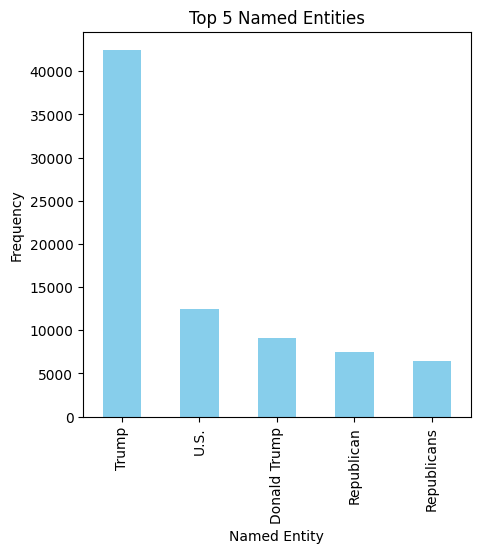

In [20]:
import matplotlib.pyplot as plt

top_entities = ner_df['Entity'].value_counts().head(5)

# Plot the top entities
plt.figure(figsize=(5, 5))
top_entities.plot(kind='bar', color='skyblue')
plt.title('Top 5 Named Entities')
plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.show()

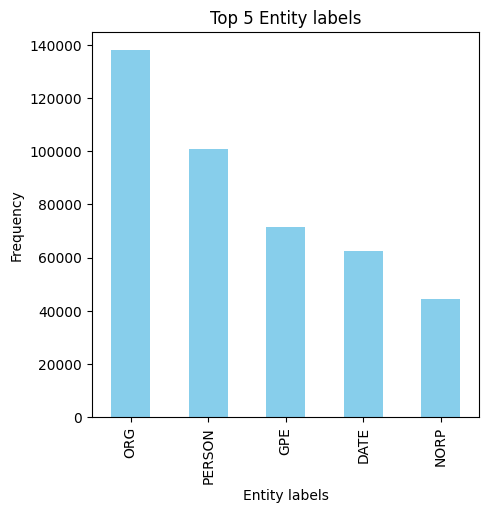

In [23]:
top_entity_labels = ner_df['Label'].value_counts().head(5)

# Plot the top entities
plt.figure(figsize=(5, 5))
top_entity_labels.plot(kind='bar', color='skyblue')
plt.title('Top 5 Entity labels')
plt.xlabel('Entity labels')
plt.ylabel('Frequency')
plt.show()

# Topic modeling

In [9]:
import pandas as pd
df = pd.read_csv("Fake_Real_Data.csv")
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [12]:
df1 = df.head(100)
df1

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
95,That Time Donald Trump Said Bill Clinton Was ...,Fake
96,U.S. appeals court ruling on Trump's revised t...,Real
97,Michigan Senator urges Congress to retain elec...,Real
98,Twitter Mocks Trump’s Face Off After Poorly-S...,Fake


In [1]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [21]:
def preprocess(text):
    doc = nlp(text.lower())
    filtered_text = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.text.strip():
            filtered_text.append(token.lemma_)       
    return filtered_text

In [22]:
df1['processed_text'] = df1['Text'].apply(preprocess)

C:\Users\HP\AppData\Local\Temp\ipykernel_8380\2707226233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processed_text'] = df1['Text'].apply(preprocess)


In [23]:
df1[['Text', 'processed_text']]

,Text,processed_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,"[trump, surrogate, brutally, stab, pathetic, v..."
1,U.S. conservative leader optimistic of common ...,"[u.s, conservative, leader, optimistic, common..."
2,"Trump proposes U.S. tax overhaul, stirs concer...","[trump, propose, u.s, tax, overhaul, stir, con..."
3,Court Forces Ohio To Allow Millions Of Illega...,"[court, force, ohio, allow, million, illegally..."
4,Democrats say Trump agrees to work on immigrat...,"[democrats, trump, agree, work, immigration, b..."
...,...,...
95,That Time Donald Trump Said Bill Clinton Was ...,"[time, donald, trump, say, bill, clinton, vict..."
96,U.S. appeals court ruling on Trump's revised t...,"[u.s, appeal, court, ruling, trump, revise, tr..."
97,Michigan Senator urges Congress to retain elec...,"[michigan, senator, urge, congress, retain, el..."
98,Twitter Mocks Trump’s Face Off After Poorly-S...,"[twitter, mocks, trump, face, poorly, spell, i..."


In [24]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [25]:
dictionary = Dictionary(df1['processed_text'])

In [26]:
# Create a Bag of Words (BoW) representation of the documents
corpus = [dictionary.doc2bow(tokens) for tokens in df1['processed_text']]

# Build the LDA model
num_topics = 3  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.013*"trump" + 0.013*"tax" + 0.010*"say" + 0.009*"s" + 0.008*"percent"')
(1, '0.026*"trump" + 0.011*"s" + 0.010*"say" + 0.008*"president" + 0.006*"donald"')
(2, '0.027*"trump" + 0.015*"say" + 0.009*"s" + 0.008*"president" + 0.007*"u.s"')
